In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/Melbourne_housing_FULL.csv")
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


# CLEAN DATA

In [ ]:
data = data.drop(["Suburb","Address","Method","SellerG","Postcode","Date","BuildingArea","YearBuilt","CouncilArea"],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34857 non-null  int64  
 1   Type           34857 non-null  object 
 2   Price          27247 non-null  float64
 3   Distance       34856 non-null  float64
 4   Bedroom2       26640 non-null  float64
 5   Bathroom       26631 non-null  float64
 6   Car            26129 non-null  float64
 7   Landsize       23047 non-null  float64
 8   Lattitude      26881 non-null  float64
 9   Longtitude     26881 non-null  float64
 10  Regionname     34854 non-null  object 
 11  Propertycount  34854 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
data.dropna(inplace=True)
data
# rooms: number of rooms
# type: h = house, u = unit, t = townhouse
# distance: distance to CBD (central business district) in km
# bedroom2: number of bedrooms (scraped from different source)
# car: number of carspots
# landsize: land size in metres
# propertycount: number of properties in that suburb

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
1,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
2,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
4,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
5,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
6,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34849,3,h,570000.0,25.5,3.0,2.0,2.0,404.0,-37.61031,145.03393,Northern Metropolitan,2940.0
34852,4,h,1480000.0,6.3,4.0,1.0,3.0,593.0,-37.81053,144.88467,Western Metropolitan,6543.0
34853,2,h,888000.0,6.3,2.0,2.0,1.0,98.0,-37.81551,144.88826,Western Metropolitan,6543.0
34854,2,t,705000.0,6.3,2.0,1.0,2.0,220.0,-37.82286,144.87856,Western Metropolitan,6543.0


In [ ]:
format = '{:.2f}'.format
data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,17679.000000,1.767900e+04,17679.000000,17679.000000,17679.000000,17679.000000,17679.000000,17679.000000,17679.000000,17679.000000
mean,3.053849,1.094974e+06,11.153114,3.036541,1.584422,1.698739,594.866282,-37.806505,144.996328,7480.045478
std,0.944396,6.559815e+05,6.643855,0.956882,0.704733,0.999023,3786.375295,0.089326,0.116925,4398.062457
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.600000e+05,6.500000,2.000000,1.000000,1.000000,222.500000,-37.859260,144.925290,4380.000000
50%,3.000000,9.125000e+05,10.400000,3.000000,1.000000,2.000000,517.000000,-37.799800,145.002700,6567.000000
75%,4.000000,1.345000e+06,13.900000,4.000000,2.000000,2.000000,664.000000,-37.749600,145.067300,10331.000000
max,12.000000,1.120000e+07,48.100000,20.000000,9.000000,18.000000,433014.000000,-37.399460,145.526350,21650.000000


# SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(['Price'], axis = 1)
y = data['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
train_data = x_train.join(y_train)

<ipython-input-71-8d442ead0510>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot= True, cmap = "YlGnBu")


<Axes: >

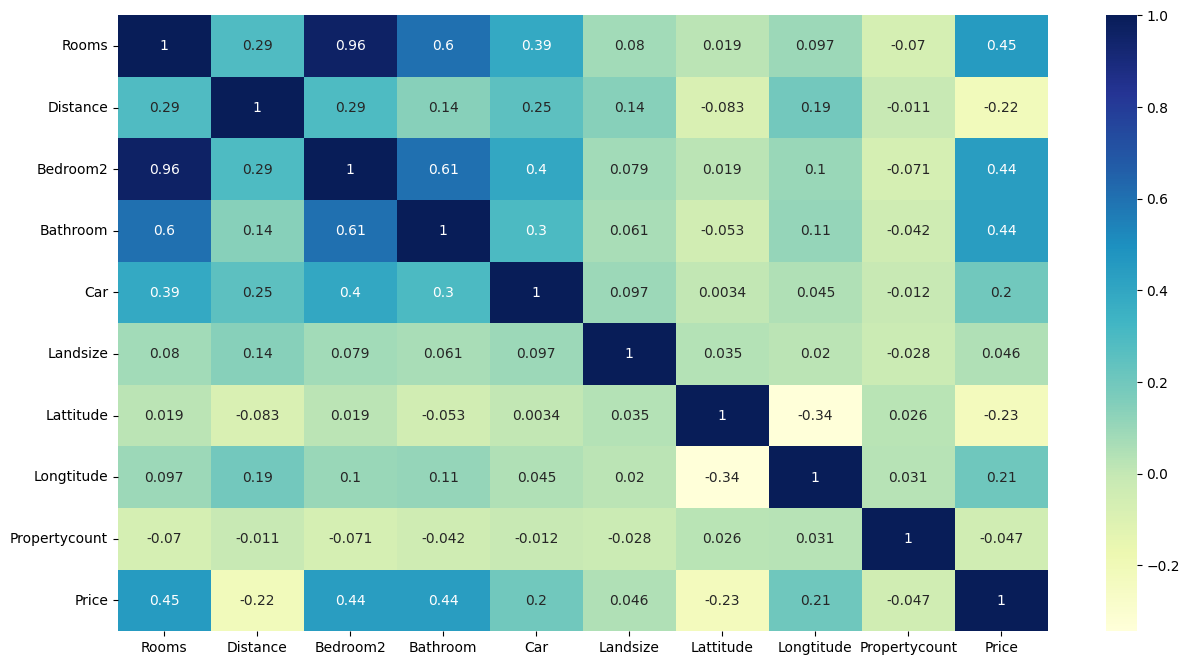

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot= True, cmap = "YlGnBu")

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

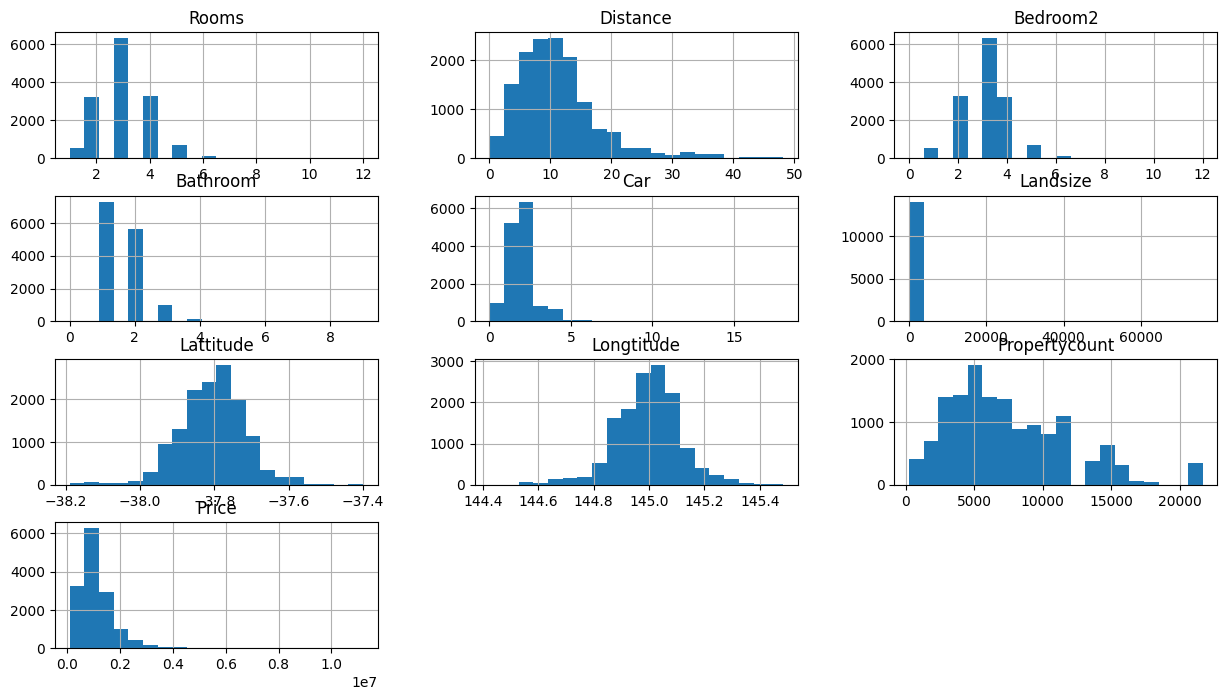

In [ ]:
train_data.hist(figsize=(15,8), bins=20)

In [ ]:
# lấy log để chuẩn hóa data
train_data['Rooms'] = np.log(train_data['Rooms'] + 1)
train_data['Bathroom'] = np.log(train_data['Bathroom'] + 1)
train_data['Distance'] = np.log(train_data['Distance'] + 1)
train_data['Car'] = np.log(train_data['Car'] + 1)
train_data['Bedroom2'] = np.log(train_data['Bedroom2'] + 1)
train_data['Landsize'] = np.log(train_data['Landsize'] + 1)
train_data['Price'] = np.log(train_data['Price'] + 1)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

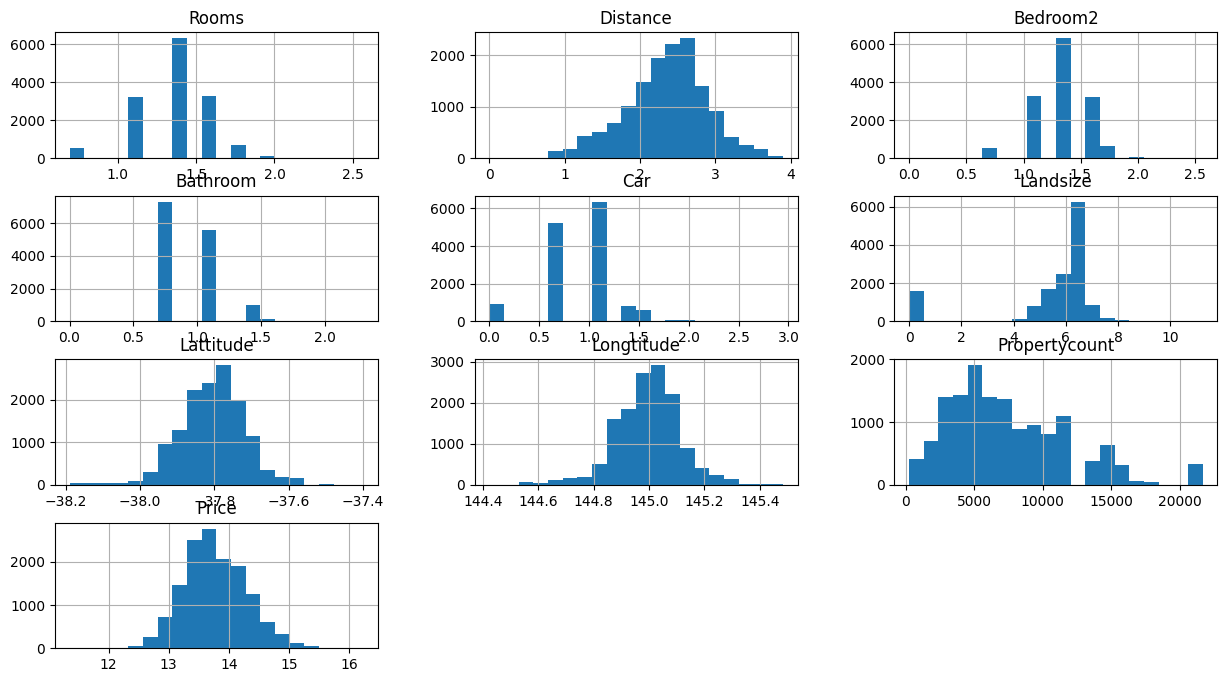

In [ ]:
train_data.hist(figsize=(15,8), bins=20)

In [ ]:
# one-hot encoding
train_data = train_data.join(pd.get_dummies(train_data.Type)).drop(['Type'],axis = 1)

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.Regionname)).drop(['Regionname'],axis = 1)

In [ ]:
train_data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Price,...,t,u,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
7412,1.098612,1.871802,1.098612,0.693147,0.693147,6.510258,-37.78330,145.01350,11364.0,13.304687,...,0,1,0,0,1,0,0,0,0,0
9807,1.386294,2.610070,1.386294,0.693147,0.693147,6.182085,-37.78660,144.84100,3755.0,13.527830,...,0,0,0,0,0,0,0,0,1,0
30277,1.609438,2.595255,1.609438,1.098612,1.609438,6.501290,-37.78323,145.12983,9028.0,14.253766,...,0,0,1,0,0,0,0,0,0,0
27503,1.609438,3.186353,1.609438,1.098612,1.098612,6.674561,-37.82920,145.30150,3598.0,13.592368,...,0,0,1,0,0,0,0,0,0,0
27850,1.609438,2.694627,1.609438,1.098612,1.098612,6.545350,-37.93520,145.00720,5454.0,14.457365,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,1.386294,1.629241,1.386294,1.098612,0.693147,5.023881,-37.84700,144.95940,2019.0,14.220976,...,0,0,0,0,0,0,0,1,0,0
30781,1.386294,3.068053,1.386294,1.098612,1.098612,5.855072,-37.63423,145.06856,7969.0,13.324489,...,0,0,0,0,1,0,0,0,0,0
34309,1.386294,3.063391,1.386294,1.098612,1.791759,6.525030,-37.64203,144.88852,4864.0,13.458837,...,0,0,0,0,1,0,0,0,0,0
11661,1.609438,2.572612,1.609438,1.386294,1.098612,5.697093,-37.89500,145.07490,4442.0,13.997833,...,1,0,0,0,0,0,0,1,0,0


<Axes: >

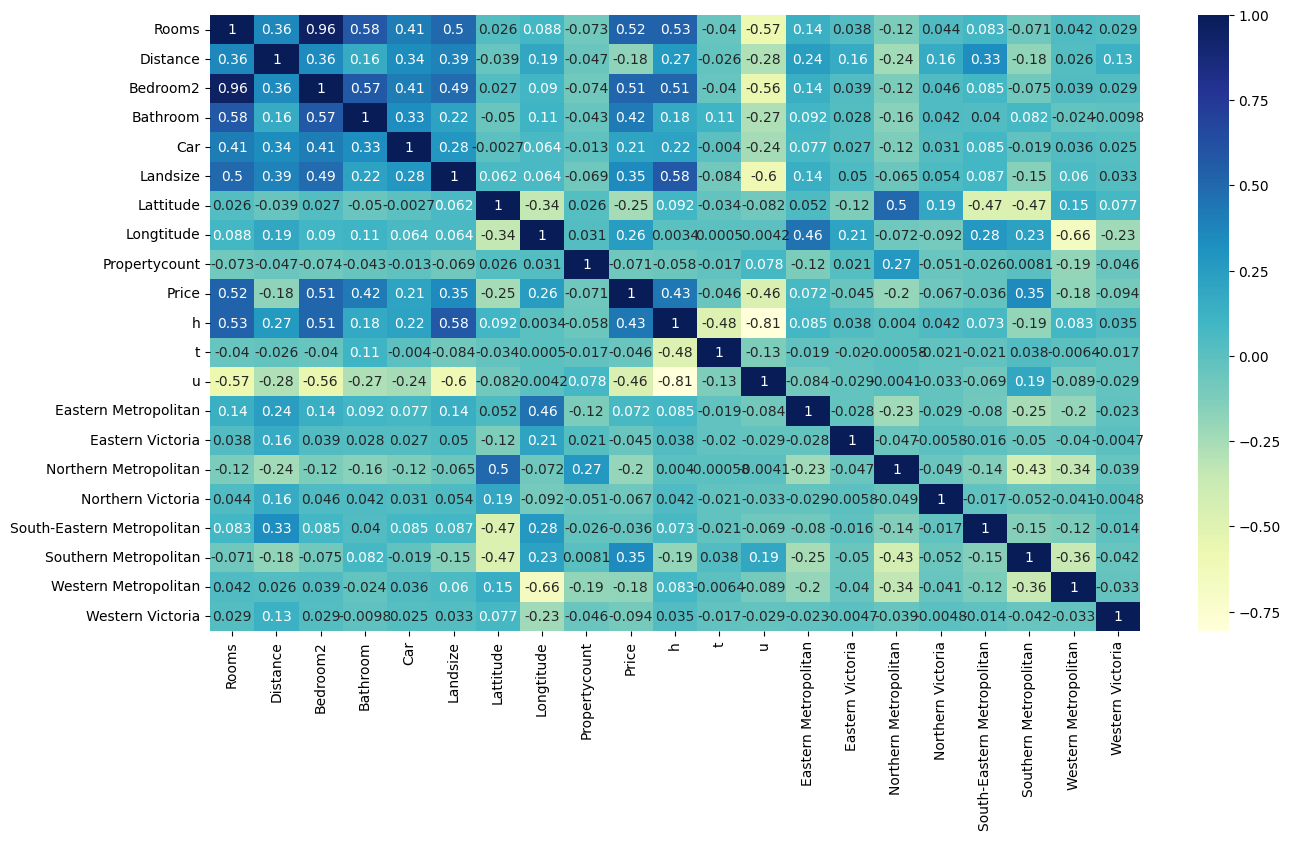

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot= True, cmap = "YlGnBu")
# heatmap correlation

Rooms, Bedroom, Bathroom, Landsize ảnh hưởng đến price nhiều nhất

Vùng Southern Metropolitan có nhà mắc nhất

Loại house sẽ mắc hơn loại townhouse và unit

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

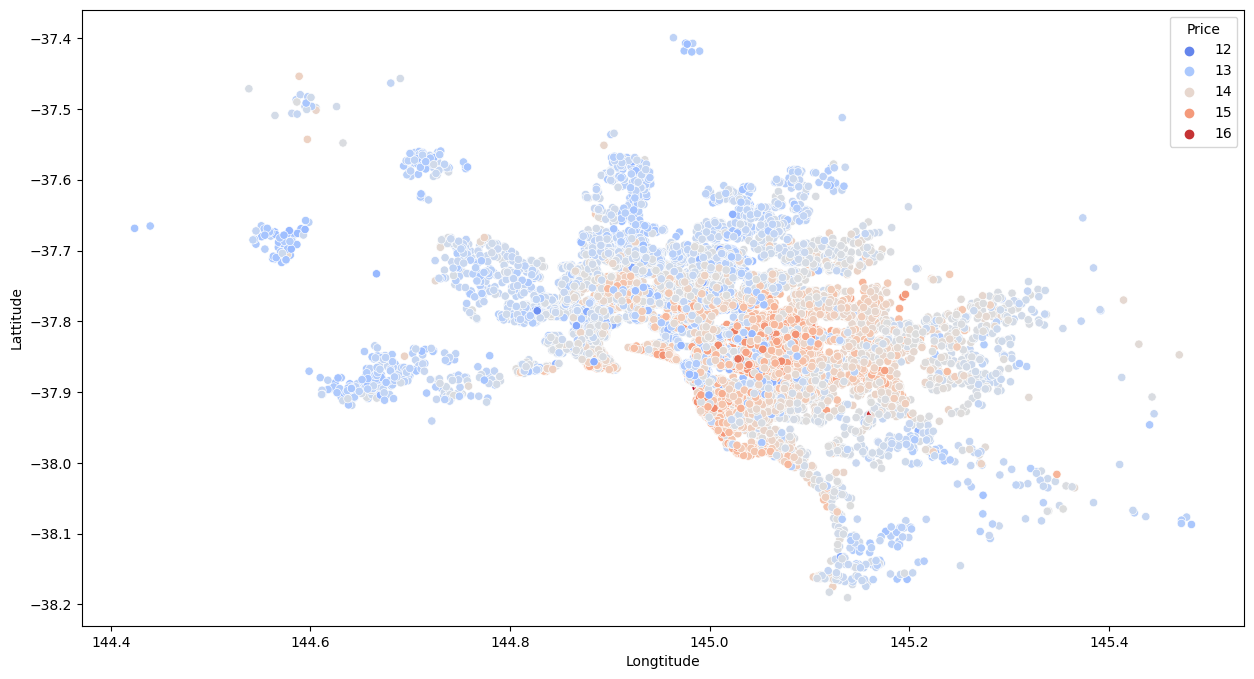

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="Lattitude",x="Longtitude", data=train_data, hue="Price", palette="coolwarm")

# Map of Melbourne
# nhà gần city hoặc sát biển sẽ thường mắc hơn

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = train_data.drop(['Price'], axis = 1)
y_train = train_data['Price']
x_train_s = scaler.fit_transform(x_train)

In [ ]:
test_data = x_test.join(y_test)

test_data['Rooms'] = np.log(test_data['Rooms'] + 1)
test_data['Bathroom'] = np.log(test_data['Bathroom'] + 1)
test_data['Distance'] = np.log(test_data['Distance'] + 1)
test_data['Car'] = np.log(test_data['Car'] + 1)
test_data['Bedroom2'] = np.log(test_data['Bedroom2'] + 1)
test_data['Landsize'] = np.log(test_data['Landsize'] + 1)
test_data['Price'] = np.log(test_data['Price'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.Type)).drop(['Type'],axis = 1)

test_data = test_data.join(pd.get_dummies(test_data.Regionname)).drop(['Regionname'],axis = 1)

In [ ]:
x_test = test_data.drop(['Price'], axis = 1)
y_test = test_data['Price']
x_test_s = scaler.transform(x_test)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.7234371602746505

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.8655936295075547

In [ ]:
forest.fit(x_train_s, y_train)
forest.score(x_test_s, y_test)

0.8656854472093485

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = forest.predict(x_test_s)

mse = mean_squared_error(y_test, y_pred)
print("Random Forest Mean Squared Error:", mse)

Random Forest Mean Squared Error: 0.036459696152648303


# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
knn_regressor.fit(x_train_s, y_train)
knn_regressor.score(x_test_s, y_test)

0.8083479712768553

In [ ]:
y_pred = knn_regressor.predict(x_test_s)

mse = mean_squared_error(y_test, y_pred)
print("KNN Mean Squared Error:", mse)

KNN Mean Squared Error: 0.052023958603917037


# XGB Regressor

In [ ]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(x_train_s, y_train)
xgb_regressor.score(x_test_s, y_test)

0.8768614864846728

In [ ]:
y_pred = xgb_regressor.predict(x_test_s)

mse = mean_squared_error(y_test, y_pred)
print("XGB Mean Squared Error:", mse)

XGB Mean Squared Error: 0.033425959392913165


XGB Regressor là algorithm tốt nhất

# Test on sample data

In [ ]:
sample = {
    'Rooms': 4,
    'Distance': 15,
    'Bathroom': 2,
    'Bedroom2': 2,
    'Car': 1,
    'Landsize': 400,
    'Lattitude': -38,
    'Longtitde': 145,
    'Propertycount': 6543,
    'h': 1,
    't': 0,
    'u': 0,
    'Eastern Metropolitan': 0,
    'Eastern Victoria': 0,
    'Northern Metropolitan': 0,
    'Northern Victoria': 0,
    'South-Eastern Metropolitan':0,
    'Southern Metropolitan': 0,
    'Western Metropolitan': 1,
    'Western Victoria': 0
}
input = pd.DataFrame([sample])
price = xgb_regressor.predict(input)

# đảo lại phép log để lấy giá gốc
price = np.exp(price)
print(f"Estimated house price: {price}")

Estimated house price: [834534.4]
